In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 75
generations = int(1500/necoc)
generations

20

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

31


In [7]:
len(number_codes[0])

75

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:808
number of class2:809

 ****** Running generation 0 ****** 

Population's average fitness: 0.50998 stdev: 0.05239
Best fitness: 0.64131 - size: (2, 13) - species 3 - id 27
Average adjusted fitness: 0.173
Mean genetic distance 2.938, standard deviation 0.489
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 30.438 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53300 stdev: 0.05841
Best fitness: 0.71738 - size: (2, 14) - species 24 - id 379
Average adjusted fitness: 0.166
Mean genetic distance 2.957, standard deviation 0.486
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 37.595 sec (34.017 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54930 stdev: 0.05884
Best fitness: 0.71738 - size: (2, 14) - species 24 - id 379
Average adjusted fitness: 0.177
Mean genetic distance 2.976, standard deviation 0.504
Population of 199 members in 27 species
Total extin

Population's average fitness: 0.56351 stdev: 0.07205
Best fitness: 0.75448 - size: (5, 16) - species 25 - id 789
Average adjusted fitness: 0.174
Mean genetic distance 3.101, standard deviation 0.498
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 30.663 sec (29.229 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56459 stdev: 0.07160
Best fitness: 0.75819 - size: (4, 16) - species 11 - id 926
Average adjusted fitness: 0.210
Mean genetic distance 3.139, standard deviation 0.518
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 31.334 sec (29.580 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56719 stdev: 0.07651
Best fitness: 0.75819 - size: (4, 16) - species 11 - id 926
Average adjusted fitness: 0.205
Mean genetic distance 3.161, standard deviation 0.500
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 32.461 sec (29.991 average)

 *****

Population's average fitness: 0.59549 stdev: 0.07851
Best fitness: 0.74397 - size: (3, 14) - species 1 - id 756
Average adjusted fitness: 0.269
Mean genetic distance 3.139, standard deviation 0.460
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 34.234 sec (32.421 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60174 stdev: 0.07605
Best fitness: 0.74892 - size: (4, 15) - species 1 - id 1493
Average adjusted fitness: 0.232
Mean genetic distance 3.176, standard deviation 0.453
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 34.995 sec (32.678 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60387 stdev: 0.07728
Best fitness: 0.74892 - size: (4, 15) - species 1 - id 1493
Average adjusted fitness: 0.230
Mean genetic distance 3.193, standard deviation 0.448
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 33.690 sec (33.372 average)

 *****

Population's average fitness: 0.62285 stdev: 0.09432
Best fitness: 0.84354 - size: (4, 17) - species 14 - id 1106
Average adjusted fitness: 0.240
Mean genetic distance 3.130, standard deviation 0.472
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 40.446 sec (34.704 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.63368 stdev: 0.08815
Best fitness: 0.84354 - size: (4, 17) - species 14 - id 1106
Average adjusted fitness: 0.190
Mean genetic distance 3.140, standard deviation 0.469
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 35.482 sec (34.667 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63460 stdev: 0.09327
Best fitness: 0.84354 - size: (4, 17) - species 14 - id 1106
Average adjusted fitness: 0.199
Mean genetic distance 3.137, standard deviation 0.470
Population of 203 members in 45 species
Total extinctions: 0
Generation time: 35.193 sec (34.798 average)

 

Population's average fitness: 0.66543 stdev: 0.14519
Best fitness: 0.85838 - size: (5, 20) - species 36 - id 1665
Average adjusted fitness: 0.387
Mean genetic distance 3.227, standard deviation 0.464
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 28.370 sec (27.996 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.67551 stdev: 0.13521
Best fitness: 0.85838 - size: (5, 20) - species 36 - id 1665
Average adjusted fitness: 0.446
Mean genetic distance 3.196, standard deviation 0.471
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 28.048 sec (28.108 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.68162 stdev: 0.12722
Best fitness: 0.85838 - size: (5, 20) - species 36 - id 1665
Average adjusted fitness: 0.375
Mean genetic distance 3.215, standard deviation 0.469
Population of 192 members in 37 species
Total extinctions: 0
Generation time: 28.320 sec (28.244 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47442 stdev: 0.08250
Best fitness: 0.64997 - size: (2, 13) - species 5 - id 106
Average adjusted fitness: 0.142
Mean genetic distance 2.892, standard deviation 0.474
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 20.526 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52037 stdev: 0.08091
Best fitness: 0.66048 - size: (3, 15) - species 5 - id 314
Average adjusted fitness: 0.198
Mean genetic distance 3.010, standard deviation 0.469
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 22.109 sec (21.318 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55188 stdev: 0.07803
Best fitness: 0.70192 - size: (3, 15) - species 4 - id 438
Average adjusted fitness: 0.206
Mean genetic distance 3.076, standard deviation 0.491
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 23.318 sec (21.9

Population's average fitness: 0.56975 stdev: 0.08938
Best fitness: 0.75758 - size: (4, 17) - species 19 - id 540
Average adjusted fitness: 0.241
Mean genetic distance 3.123, standard deviation 0.474
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 24.656 sec (22.702 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57383 stdev: 0.09738
Best fitness: 0.76252 - size: (6, 20) - species 31 - id 992
Average adjusted fitness: 0.309
Mean genetic distance 3.149, standard deviation 0.475
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 26.019 sec (23.254 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57384 stdev: 0.09238
Best fitness: 0.76252 - size: (6, 20) - species 31 - id 992
Average adjusted fitness: 0.226
Mean genetic distance 3.183, standard deviation 0.477
Population of 195 members in 35 species
Total extinctions: 0
Generation time: 26.406 sec (23.705 average)

 *****

Population's average fitness: 0.70811 stdev: 0.17544
Best fitness: 0.86456 - size: (5, 19) - species 2 - id 1055
Average adjusted fitness: 0.492
Mean genetic distance 3.107, standard deviation 0.475
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 25.829 sec (23.909 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71966 stdev: 0.17146
Best fitness: 0.86704 - size: (5, 20) - species 5 - id 1424
Average adjusted fitness: 0.525
Mean genetic distance 3.113, standard deviation 0.483
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 25.588 sec (24.077 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69601 stdev: 0.18466
Best fitness: 0.86704 - size: (5, 20) - species 5 - id 1424
Average adjusted fitness: 0.492
Mean genetic distance 3.102, standard deviation 0.470
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 26.309 sec (24.641 average)

 ****

Population's average fitness: 0.61540 stdev: 0.09856
Best fitness: 0.77427 - size: (5, 17) - species 5 - id 1238
Average adjusted fitness: 0.238
Mean genetic distance 3.122, standard deviation 0.476
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 28.348 sec (26.617 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62932 stdev: 0.08399
Best fitness: 0.77427 - size: (5, 17) - species 5 - id 1238
Average adjusted fitness: 0.242
Mean genetic distance 3.119, standard deviation 0.479
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 28.347 sec (26.939 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62110 stdev: 0.09385
Best fitness: 0.77427 - size: (5, 17) - species 5 - id 1238
Average adjusted fitness: 0.223
Mean genetic distance 3.122, standard deviation 0.477
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 29.571 sec (27.429 average)

 ***

Population's average fitness: 0.63507 stdev: 0.08516
Best fitness: 0.78046 - size: (6, 23) - species 35 - id 2304
Average adjusted fitness: 0.252
Mean genetic distance 3.236, standard deviation 0.480
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 27.672 sec (26.898 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.62479 stdev: 0.10291
Best fitness: 0.78046 - size: (6, 23) - species 35 - id 2304
Average adjusted fitness: 0.318
Mean genetic distance 3.255, standard deviation 0.499
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 28.703 sec (27.151 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.63187 stdev: 0.09643
Best fitness: 0.78046 - size: (6, 23) - species 35 - id 2304
Average adjusted fitness: 0.263
Mean genetic distance 3.249, standard deviation 0.490
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 28.648 sec (27.409 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.46117 stdev: 0.14320
Best fitness: 0.74521 - size: (2, 13) - species 2 - id 121
Average adjusted fitness: 0.201
Mean genetic distance 2.879, standard deviation 0.469
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 21.654 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56303 stdev: 0.14244
Best fitness: 0.77427 - size: (2, 13) - species 6 - id 324
Average adjusted fitness: 0.308
Mean genetic distance 3.045, standard deviation 0.494
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 22.256 sec (21.955 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60545 stdev: 0.13349
Best fitness: 0.77427 - size: (2, 13) - species 1 - id 324
Average adjusted fitness: 0.318
Mean genetic distance 3.116, standard deviation 0.498
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 22.615 sec (22.1

Population's average fitness: 0.62535 stdev: 0.13607
Best fitness: 0.83179 - size: (3, 14) - species 28 - id 676
Average adjusted fitness: 0.370
Mean genetic distance 3.000, standard deviation 0.472
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 24.681 sec (22.780 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.62113 stdev: 0.13638
Best fitness: 0.83179 - size: (3, 14) - species 28 - id 676
Average adjusted fitness: 0.348
Mean genetic distance 2.995, standard deviation 0.473
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 23.677 sec (22.930 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62985 stdev: 0.13984
Best fitness: 0.83179 - size: (3, 14) - species 28 - id 676
Average adjusted fitness: 0.346
Mean genetic distance 3.024, standard deviation 0.467
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 25.181 sec (23.251 average)

 *****

Population's average fitness: 0.59356 stdev: 0.08980
Best fitness: 0.74026 - size: (5, 19) - species 26 - id 856
Average adjusted fitness: 0.262
Mean genetic distance 3.023, standard deviation 0.518
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 26.302 sec (24.528 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.60271 stdev: 0.08379
Best fitness: 0.74026 - size: (5, 19) - species 26 - id 856
Average adjusted fitness: 0.242
Mean genetic distance 3.063, standard deviation 0.533
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 26.485 sec (24.724 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60144 stdev: 0.08503
Best fitness: 0.78231 - size: (5, 20) - species 27 - id 1745
Average adjusted fitness: 0.214
Mean genetic distance 3.058, standard deviation 0.525
Population of 196 members in 29 species
Total extinctions: 0
Generation time: 26.123 sec (25.249 average)

 ***

Population's average fitness: 0.72226 stdev: 0.16461
Best fitness: 0.85776 - size: (7, 22) - species 16 - id 1825
Average adjusted fitness: 0.519
Mean genetic distance 3.096, standard deviation 0.481
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 26.895 sec (25.602 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72708 stdev: 0.15440
Best fitness: 0.85776 - size: (7, 22) - species 16 - id 1825
Average adjusted fitness: 0.524
Mean genetic distance 3.093, standard deviation 0.482
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 26.525 sec (25.840 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.74319 stdev: 0.13541
Best fitness: 0.85776 - size: (7, 22) - species 16 - id 1825
Average adjusted fitness: 0.539
Mean genetic distance 3.092, standard deviation 0.482
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 26.063 sec (26.044 average)

 

Population's average fitness: 0.64456 stdev: 0.09286
Best fitness: 0.78912 - size: (7, 20) - species 27 - id 1951
Average adjusted fitness: 0.248
Mean genetic distance 3.173, standard deviation 0.468
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 27.051 sec (26.469 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64722 stdev: 0.09576
Best fitness: 0.79159 - size: (7, 20) - species 1 - id 2565
Average adjusted fitness: 0.179
Mean genetic distance 3.203, standard deviation 0.451
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 27.937 sec (26.785 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.64613 stdev: 0.09433
Best fitness: 0.80087 - size: (6, 18) - species 37 - id 2680
Average adjusted fitness: 0.210
Mean genetic distance 3.205, standard deviation 0.471
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 28.067 sec (26.995 average)

 *


 ****** Running generation 0 ****** 

Population's average fitness: 0.52377 stdev: 0.08621
Best fitness: 0.71305 - size: (2, 13) - species 2 - id 6
Average adjusted fitness: 0.204
Mean genetic distance 2.836, standard deviation 0.508
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 20.395 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56050 stdev: 0.08794
Best fitness: 0.73840 - size: (3, 14) - species 2 - id 383
Average adjusted fitness: 0.197
Mean genetic distance 2.951, standard deviation 0.510
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 22.137 sec (21.266 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58171 stdev: 0.08576
Best fitness: 0.76871 - size: (3, 14) - species 2 - id 554
Average adjusted fitness: 0.220
Mean genetic distance 3.065, standard deviation 0.496
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 23.000 sec (21.844

Population's average fitness: 0.61835 stdev: 0.14486
Best fitness: 0.78850 - size: (4, 18) - species 11 - id 815
Average adjusted fitness: 0.382
Mean genetic distance 3.179, standard deviation 0.543
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 24.136 sec (22.740 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63096 stdev: 0.13799
Best fitness: 0.78850 - size: (4, 18) - species 11 - id 815
Average adjusted fitness: 0.362
Mean genetic distance 3.171, standard deviation 0.553
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 24.454 sec (23.025 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.65563 stdev: 0.12338
Best fitness: 0.78850 - size: (4, 18) - species 11 - id 815
Average adjusted fitness: 0.380
Mean genetic distance 3.177, standard deviation 0.552
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 25.386 sec (23.363 average)

 *****

Population's average fitness: 0.65200 stdev: 0.13800
Best fitness: 0.82684 - size: (5, 21) - species 33 - id 1206
Average adjusted fitness: 0.349
Mean genetic distance 3.145, standard deviation 0.510
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 25.665 sec (24.142 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65645 stdev: 0.12997
Best fitness: 0.82684 - size: (5, 21) - species 33 - id 1206
Average adjusted fitness: 0.339
Mean genetic distance 3.135, standard deviation 0.497
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 26.134 sec (24.341 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66366 stdev: 0.12979
Best fitness: 0.86085 - size: (6, 22) - species 33 - id 1594
Average adjusted fitness: 0.410
Mean genetic distance 3.126, standard deviation 0.480
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 26.415 sec (24.912 average)

 *

Population's average fitness: 0.64471 stdev: 0.12673
Best fitness: 0.85962 - size: (4, 16) - species 32 - id 918
Average adjusted fitness: 0.373
Mean genetic distance 3.178, standard deviation 0.451
Population of 210 members in 48 species
Total extinctions: 0
Generation time: 26.706 sec (25.828 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64387 stdev: 0.12506
Best fitness: 0.85962 - size: (4, 16) - species 32 - id 918
Average adjusted fitness: 0.330
Mean genetic distance 3.171, standard deviation 0.462
Population of 199 members in 48 species
Total extinctions: 0
Generation time: 27.919 sec (26.243 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.65007 stdev: 0.12411
Best fitness: 0.85962 - size: (4, 16) - species 32 - id 918
Average adjusted fitness: 0.383
Mean genetic distance 3.172, standard deviation 0.465
Population of 203 members in 48 species
Total extinctions: 0
Generation time: 26.593 sec (26.428 average)

 ***

Population's average fitness: 0.61506 stdev: 0.10294
Best fitness: 0.80705 - size: (4, 17) - species 16 - id 2328
Average adjusted fitness: 0.301
Mean genetic distance 3.226, standard deviation 0.496
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 29.065 sec (27.994 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.61759 stdev: 0.10534
Best fitness: 0.80705 - size: (4, 17) - species 16 - id 2328
Average adjusted fitness: 0.270
Mean genetic distance 3.234, standard deviation 0.502
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 28.198 sec (28.184 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.62703 stdev: 0.09850
Best fitness: 0.80705 - size: (4, 17) - species 16 - id 2328
Average adjusted fitness: 0.260
Mean genetic distance 3.248, standard deviation 0.506
Population of 197 members in 30 species
Total extinctions: 0
Generation time: 29.567 sec (28.366 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.47658 stdev: 0.09719
Best fitness: 0.71800 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.236
Mean genetic distance 2.814, standard deviation 0.458
Population of 201 members in 18 species
Total extinctions: 0
Generation time: 20.741 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54320 stdev: 0.09618
Best fitness: 0.72727 - size: (3, 14) - species 2 - id 311
Average adjusted fitness: 0.219
Mean genetic distance 2.944, standard deviation 0.440
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.903 sec (21.322 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56817 stdev: 0.09137
Best fitness: 0.72727 - size: (3, 14) - species 6 - id 311
Average adjusted fitness: 0.216
Mean genetic distance 2.958, standard deviation 0.496
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 23.423 sec (22.02

Population's average fitness: 0.55709 stdev: 0.07581
Best fitness: 0.67285 - size: (2, 14) - species 6 - id 827
Average adjusted fitness: 0.160
Mean genetic distance 2.985, standard deviation 0.480
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 24.139 sec (22.680 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57102 stdev: 0.06941
Best fitness: 0.68336 - size: (2, 14) - species 6 - id 971
Average adjusted fitness: 0.179
Mean genetic distance 3.023, standard deviation 0.470
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 24.649 sec (23.008 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57333 stdev: 0.07317
Best fitness: 0.72356 - size: (3, 16) - species 6 - id 1103
Average adjusted fitness: 0.193
Mean genetic distance 3.086, standard deviation 0.481
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 25.102 sec (23.307 average)

 ****** 

Population's average fitness: 0.61534 stdev: 0.09033
Best fitness: 0.78788 - size: (6, 18) - species 35 - id 1075
Average adjusted fitness: 0.203
Mean genetic distance 3.161, standard deviation 0.457
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 26.583 sec (24.711 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62252 stdev: 0.09046
Best fitness: 0.78788 - size: (6, 18) - species 35 - id 1075
Average adjusted fitness: 0.285
Mean genetic distance 3.185, standard deviation 0.469
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 26.492 sec (24.890 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62815 stdev: 0.08576
Best fitness: 0.82066 - size: (4, 19) - species 9 - id 1497
Average adjusted fitness: 0.199
Mean genetic distance 3.184, standard deviation 0.462
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 28.581 sec (25.681 average)

 **

Population's average fitness: 0.62505 stdev: 0.14371
Best fitness: 0.77798 - size: (2, 14) - species 21 - id 986
Average adjusted fitness: 0.323
Mean genetic distance 3.151, standard deviation 0.498
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 28.434 sec (26.130 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64305 stdev: 0.12760
Best fitness: 0.77984 - size: (3, 17) - species 18 - id 2023
Average adjusted fitness: 0.342
Mean genetic distance 3.167, standard deviation 0.495
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 29.508 sec (26.582 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64009 stdev: 0.13464
Best fitness: 0.77984 - size: (3, 17) - species 18 - id 2023
Average adjusted fitness: 0.339
Mean genetic distance 3.162, standard deviation 0.495
Population of 195 members in 42 species
Total extinctions: 0
Generation time: 27.196 sec (26.746 average)

 *

Population's average fitness: 0.60316 stdev: 0.08736
Best fitness: 0.73408 - size: (4, 17) - species 2 - id 2102
Average adjusted fitness: 0.207
Mean genetic distance 3.191, standard deviation 0.498
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 28.487 sec (27.390 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.60568 stdev: 0.08567
Best fitness: 0.73408 - size: (4, 17) - species 2 - id 2102
Average adjusted fitness: 0.220
Mean genetic distance 3.190, standard deviation 0.491
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 28.213 sec (27.555 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.60912 stdev: 0.08711
Best fitness: 0.73469 - size: (3, 16) - species 16 - id 2748
Average adjusted fitness: 0.224
Mean genetic distance 3.180, standard deviation 0.491
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 28.855 sec (27.792 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.47109 stdev: 0.15171
Best fitness: 0.83673 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.216
Mean genetic distance 2.907, standard deviation 0.491
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 20.916 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55619 stdev: 0.15756
Best fitness: 0.83673 - size: (2, 13) - species 1 - id 80
Average adjusted fitness: 0.329
Mean genetic distance 3.039, standard deviation 0.525
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 22.039 sec (21.477 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60868 stdev: 0.13759
Best fitness: 0.84663 - size: (2, 14) - species 1 - id 549
Average adjusted fitness: 0.344
Mean genetic distance 3.128, standard deviation 0.524
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 23.380 sec (22.112

Population's average fitness: 0.56254 stdev: 0.08138
Best fitness: 0.70686 - size: (4, 17) - species 2 - id 508
Average adjusted fitness: 0.221
Mean genetic distance 3.061, standard deviation 0.480
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 24.424 sec (23.374 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57600 stdev: 0.07730
Best fitness: 0.72233 - size: (4, 16) - species 7 - id 933
Average adjusted fitness: 0.200
Mean genetic distance 3.064, standard deviation 0.474
Population of 194 members in 36 species
Total extinctions: 0
Generation time: 24.563 sec (23.572 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58304 stdev: 0.07847
Best fitness: 0.72233 - size: (4, 16) - species 7 - id 933
Average adjusted fitness: 0.225
Mean genetic distance 3.089, standard deviation 0.463
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 24.251 sec (23.669 average)

 ****** R

Population's average fitness: 0.58570 stdev: 0.07469
Best fitness: 0.74459 - size: (2, 14) - species 29 - id 678
Average adjusted fitness: 0.198
Mean genetic distance 2.996, standard deviation 0.474
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 24.784 sec (24.120 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59242 stdev: 0.07986
Best fitness: 0.74459 - size: (2, 14) - species 29 - id 678
Average adjusted fitness: 0.250
Mean genetic distance 3.021, standard deviation 0.469
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 25.993 sec (24.307 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59267 stdev: 0.07755
Best fitness: 0.74459 - size: (2, 14) - species 29 - id 678
Average adjusted fitness: 0.187
Mean genetic distance 3.010, standard deviation 0.469
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 25.255 sec (24.759 average)

 ****

Population's average fitness: 0.76331 stdev: 0.15654
Best fitness: 0.90414 - size: (3, 16) - species 1 - id 1704
Average adjusted fitness: 0.577
Mean genetic distance 3.209, standard deviation 0.495
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 27.980 sec (26.527 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.77470 stdev: 0.15426
Best fitness: 0.90414 - size: (3, 16) - species 1 - id 1704
Average adjusted fitness: 0.577
Mean genetic distance 3.250, standard deviation 0.493
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 28.333 sec (26.962 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.76664 stdev: 0.15904
Best fitness: 0.90414 - size: (3, 16) - species 1 - id 1704
Average adjusted fitness: 0.566
Mean genetic distance 3.250, standard deviation 0.487
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 28.635 sec (27.306 average)

 ***

Population's average fitness: 0.64876 stdev: 0.08969
Best fitness: 0.78788 - size: (4, 18) - species 17 - id 1727
Average adjusted fitness: 0.294
Mean genetic distance 3.150, standard deviation 0.490
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 28.422 sec (26.977 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.64673 stdev: 0.09762
Best fitness: 0.78788 - size: (8, 23) - species 21 - id 2531
Average adjusted fitness: 0.263
Mean genetic distance 3.162, standard deviation 0.481
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 28.131 sec (27.198 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.65547 stdev: 0.09918
Best fitness: 0.78788 - size: (8, 23) - species 21 - id 2531
Average adjusted fitness: 0.257
Mean genetic distance 3.151, standard deviation 0.484
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 27.702 sec (27.377 average)

 


 ****** Running generation 0 ****** 

Population's average fitness: 0.52842 stdev: 0.14348
Best fitness: 0.76067 - size: (2, 13) - species 1 - id 5
Average adjusted fitness: 0.271
Mean genetic distance 2.839, standard deviation 0.463
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 20.819 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60813 stdev: 0.12184
Best fitness: 0.76562 - size: (2, 13) - species 3 - id 275
Average adjusted fitness: 0.383
Mean genetic distance 2.976, standard deviation 0.466
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 22.119 sec (21.469 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64863 stdev: 0.09963
Best fitness: 0.78912 - size: (3, 16) - species 1 - id 530
Average adjusted fitness: 0.342
Mean genetic distance 2.979, standard deviation 0.467
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 23.417 sec (22.118

Population's average fitness: 0.57645 stdev: 0.08541
Best fitness: 0.79159 - size: (3, 16) - species 20 - id 670
Average adjusted fitness: 0.266
Mean genetic distance 3.054, standard deviation 0.483
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 24.453 sec (23.007 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58237 stdev: 0.09044
Best fitness: 0.82004 - size: (5, 20) - species 38 - id 946
Average adjusted fitness: 0.266
Mean genetic distance 3.043, standard deviation 0.481
Population of 197 members in 39 species
Total extinctions: 0
Generation time: 25.699 sec (23.456 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59254 stdev: 0.09083
Best fitness: 0.82870 - size: (5, 20) - species 20 - id 1083
Average adjusted fitness: 0.236
Mean genetic distance 3.060, standard deviation 0.498
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 25.318 sec (23.722 average)

 ****

Population's average fitness: 0.65059 stdev: 0.12986
Best fitness: 0.79654 - size: (6, 18) - species 14 - id 1328
Average adjusted fitness: 0.377
Mean genetic distance 3.140, standard deviation 0.486
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 24.415 sec (22.502 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64644 stdev: 0.13641
Best fitness: 0.79654 - size: (4, 17) - species 21 - id 1466
Average adjusted fitness: 0.356
Mean genetic distance 3.125, standard deviation 0.487
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 24.744 sec (22.726 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65985 stdev: 0.12492
Best fitness: 0.79654 - size: (4, 17) - species 21 - id 1466
Average adjusted fitness: 0.377
Mean genetic distance 3.149, standard deviation 0.477
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 24.146 sec (23.057 average)

 *

Population's average fitness: 0.77977 stdev: 0.21508
Best fitness: 0.97032 - size: (4, 18) - species 25 - id 1921
Average adjusted fitness: 0.669
Mean genetic distance 3.055, standard deviation 0.503
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 20.492 sec (19.598 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.76516 stdev: 0.23590
Best fitness: 0.97032 - size: (4, 18) - species 25 - id 1921
Average adjusted fitness: 0.656
Mean genetic distance 3.081, standard deviation 0.520
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 20.318 sec (19.785 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.76841 stdev: 0.23052
Best fitness: 0.97032 - size: (4, 18) - species 25 - id 1921
Average adjusted fitness: 0.664
Mean genetic distance 3.107, standard deviation 0.504
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 20.769 sec (19.994 average)

 

Population's average fitness: 0.58227 stdev: 0.09009
Best fitness: 0.69017 - size: (5, 19) - species 28 - id 1565
Average adjusted fitness: 0.208
Mean genetic distance 3.158, standard deviation 0.487
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 16.697 sec (17.339 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.58536 stdev: 0.08473
Best fitness: 0.69017 - size: (5, 19) - species 28 - id 1565
Average adjusted fitness: 0.249
Mean genetic distance 3.182, standard deviation 0.503
Population of 192 members in 29 species
Total extinctions: 0
Generation time: 16.700 sec (17.152 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.59000 stdev: 0.08389
Best fitness: 0.69388 - size: (7, 22) - species 16 - id 2741
Average adjusted fitness: 0.221
Mean genetic distance 3.208, standard deviation 0.508
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 16.417 sec (16.945 average)

 

Population's average fitness: 0.42987 stdev: 0.20415
Best fitness: 0.80643 - size: (2, 13) - species 4 - id 124
Average adjusted fitness: 0.207
Mean genetic distance 3.003, standard deviation 0.517
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.977 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58650 stdev: 0.21147
Best fitness: 0.81200 - size: (3, 14) - species 11 - id 238
Average adjusted fitness: 0.398
Mean genetic distance 3.099, standard deviation 0.533
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 9.689 sec (9.333 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64790 stdev: 0.17818
Best fitness: 0.83364 - size: (3, 15) - species 12 - id 439
Average adjusted fitness: 0.405
Mean genetic distance 3.124, standard deviation 0.525
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 10.283 sec (9.650 average)

 ****** Running generation 3

Population's average fitness: 0.64753 stdev: 0.11357
Best fitness: 0.76067 - size: (2, 14) - species 5 - id 847
Average adjusted fitness: 0.391
Mean genetic distance 3.039, standard deviation 0.487
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 10.557 sec (10.015 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64532 stdev: 0.12246
Best fitness: 0.76067 - size: (2, 14) - species 5 - id 847
Average adjusted fitness: 0.377
Mean genetic distance 3.057, standard deviation 0.479
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 10.870 sec (10.157 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63953 stdev: 0.12825
Best fitness: 0.76376 - size: (3, 13) - species 29 - id 1072
Average adjusted fitness: 0.383
Mean genetic distance 3.068, standard deviation 0.473
Population of 193 members in 34 species
Total extinctions: 0
Generation time: 10.588 sec (10.219 average)

 ******

Population's average fitness: 0.65017 stdev: 0.12018
Best fitness: 0.76994 - size: (2, 13) - species 30 - id 834
Average adjusted fitness: 0.387
Mean genetic distance 3.169, standard deviation 0.514
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 10.081 sec (8.917 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.66742 stdev: 0.10637
Best fitness: 0.76994 - size: (2, 13) - species 30 - id 834
Average adjusted fitness: 0.369
Mean genetic distance 3.150, standard deviation 0.513
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 9.894 sec (9.014 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.66613 stdev: 0.10307
Best fitness: 0.77551 - size: (7, 23) - species 28 - id 1620
Average adjusted fitness: 0.363
Mean genetic distance 3.144, standard deviation 0.520
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 10.001 sec (9.272 average)

 ****** 

Population's average fitness: 0.61303 stdev: 0.09180
Best fitness: 0.75448 - size: (6, 21) - species 24 - id 1922
Average adjusted fitness: 0.294
Mean genetic distance 3.136, standard deviation 0.472
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 10.321 sec (9.583 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60087 stdev: 0.10070
Best fitness: 0.75448 - size: (6, 21) - species 24 - id 1922
Average adjusted fitness: 0.266
Mean genetic distance 3.157, standard deviation 0.483
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 10.255 sec (9.716 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62553 stdev: 0.08963
Best fitness: 0.76005 - size: (7, 22) - species 30 - id 2115
Average adjusted fitness: 0.228
Mean genetic distance 3.191, standard deviation 0.468
Population of 207 members in 36 species
Total extinctions: 0
Generation time: 10.409 sec (9.799 average)

 ***

Population's average fitness: 0.65657 stdev: 0.13646
Best fitness: 0.83859 - size: (3, 14) - species 2 - id 2438
Average adjusted fitness: 0.401
Mean genetic distance 3.149, standard deviation 0.506
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 9.893 sec (9.963 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65955 stdev: 0.14139
Best fitness: 0.83859 - size: (3, 14) - species 2 - id 2438
Average adjusted fitness: 0.362
Mean genetic distance 3.196, standard deviation 0.507
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 9.830 sec (9.986 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66527 stdev: 0.14061
Best fitness: 0.83859 - size: (3, 14) - species 2 - id 2438
Average adjusted fitness: 0.361
Mean genetic distance 3.193, standard deviation 0.524
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 10.085 sec (10.055 average)

 ****** 

Population's average fitness: 0.47959 stdev: 0.09528
Best fitness: 0.70130 - size: (2, 13) - species 3 - id 103
Average adjusted fitness: 0.215
Mean genetic distance 2.926, standard deviation 0.452
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.691 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53693 stdev: 0.09581
Best fitness: 0.73222 - size: (3, 14) - species 3 - id 343
Average adjusted fitness: 0.256
Mean genetic distance 3.002, standard deviation 0.475
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.119 sec (7.905 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55172 stdev: 0.09135
Best fitness: 0.73222 - size: (3, 14) - species 3 - id 343
Average adjusted fitness: 0.209
Mean genetic distance 3.028, standard deviation 0.499
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.305 sec (8.038 average)

 ****** Running generation 3 **

Population's average fitness: 0.60806 stdev: 0.10313
Best fitness: 0.79901 - size: (2, 13) - species 13 - id 10
Average adjusted fitness: 0.351
Mean genetic distance 3.101, standard deviation 0.496
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.804 sec (8.215 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.61921 stdev: 0.09536
Best fitness: 0.80334 - size: (3, 17) - species 2 - id 912
Average adjusted fitness: 0.301
Mean genetic distance 3.100, standard deviation 0.499
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.825 sec (8.317 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63036 stdev: 0.09432
Best fitness: 0.84725 - size: (2, 15) - species 13 - id 1070
Average adjusted fitness: 0.321
Mean genetic distance 3.119, standard deviation 0.491
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 8.931 sec (8.404 average)

 ****** Runni

Population's average fitness: 0.61889 stdev: 0.09094
Best fitness: 0.76129 - size: (2, 15) - species 14 - id 796
Average adjusted fitness: 0.303
Mean genetic distance 3.097, standard deviation 0.480
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 9.700 sec (8.842 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.62190 stdev: 0.08656
Best fitness: 0.76129 - size: (2, 15) - species 14 - id 796
Average adjusted fitness: 0.257
Mean genetic distance 3.115, standard deviation 0.478
Population of 194 members in 38 species
Total extinctions: 0
Generation time: 9.602 sec (8.918 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61453 stdev: 0.09377
Best fitness: 0.76129 - size: (2, 15) - species 14 - id 796
Average adjusted fitness: 0.303
Mean genetic distance 3.133, standard deviation 0.488
Population of 188 members in 38 species
Total extinctions: 0
Generation time: 9.505 sec (9.116 average)

 ****** Run

Population's average fitness: 0.67363 stdev: 0.12282
Best fitness: 0.90167 - size: (4, 17) - species 29 - id 690
Average adjusted fitness: 0.308
Mean genetic distance 3.158, standard deviation 0.484
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 9.539 sec (9.702 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67940 stdev: 0.13111
Best fitness: 0.90600 - size: (5, 20) - species 29 - id 1989
Average adjusted fitness: 0.404
Mean genetic distance 3.153, standard deviation 0.472
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.646 sec (9.777 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.69317 stdev: 0.12120
Best fitness: 0.90600 - size: (5, 20) - species 29 - id 1989
Average adjusted fitness: 0.349
Mean genetic distance 3.151, standard deviation 0.486
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 10.297 sec (9.918 average)

 ******

Population's average fitness: 0.71782 stdev: 0.17270
Best fitness: 0.86642 - size: (2, 15) - species 1 - id 1210
Average adjusted fitness: 0.511
Mean genetic distance 3.225, standard deviation 0.499
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 10.126 sec (9.958 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.70743 stdev: 0.18587
Best fitness: 0.87137 - size: (3, 17) - species 1 - id 2478
Average adjusted fitness: 0.517
Mean genetic distance 3.220, standard deviation 0.498
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 10.440 sec (10.051 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.74166 stdev: 0.15476
Best fitness: 0.87137 - size: (3, 17) - species 1 - id 2478
Average adjusted fitness: 0.537
Mean genetic distance 3.220, standard deviation 0.495
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 10.479 sec (10.123 average)

 ****

Population's average fitness: 0.50017 stdev: 0.06656
Best fitness: 0.73408 - size: (2, 13) - species 4 - id 56
Average adjusted fitness: 0.218
Mean genetic distance 2.859, standard deviation 0.442
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 7.786 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53455 stdev: 0.07315
Best fitness: 0.73717 - size: (3, 15) - species 1 - id 334
Average adjusted fitness: 0.195
Mean genetic distance 2.954, standard deviation 0.447
Population of 204 members in 26 species
Total extinctions: 0
Generation time: 8.129 sec (7.957 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55482 stdev: 0.07838
Best fitness: 0.76005 - size: (4, 16) - species 6 - id 476
Average adjusted fitness: 0.218
Mean genetic distance 3.001, standard deviation 0.448
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.613 sec (8.176 average)

 ****** Running generation 3 ***

Population's average fitness: 0.56121 stdev: 0.06749
Best fitness: 0.74768 - size: (4, 17) - species 10 - id 687
Average adjusted fitness: 0.166
Mean genetic distance 3.132, standard deviation 0.464
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.969 sec (8.446 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57058 stdev: 0.07070
Best fitness: 0.74768 - size: (4, 17) - species 10 - id 687
Average adjusted fitness: 0.147
Mean genetic distance 3.138, standard deviation 0.485
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 9.028 sec (8.543 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57842 stdev: 0.07589
Best fitness: 0.74768 - size: (4, 17) - species 10 - id 687
Average adjusted fitness: 0.164
Mean genetic distance 3.113, standard deviation 0.480
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 9.190 sec (8.636 average)

 ****** Runn

Population's average fitness: 0.71680 stdev: 0.15883
Best fitness: 0.85281 - size: (4, 19) - species 23 - id 1206
Average adjusted fitness: 0.496
Mean genetic distance 3.086, standard deviation 0.479
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 9.382 sec (9.035 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.68666 stdev: 0.18517
Best fitness: 0.85281 - size: (4, 19) - species 23 - id 1206
Average adjusted fitness: 0.460
Mean genetic distance 3.090, standard deviation 0.476
Population of 205 members in 41 species
Total extinctions: 0
Generation time: 9.976 sec (9.129 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.69972 stdev: 0.16256
Best fitness: 0.85281 - size: (4, 19) - species 23 - id 1206
Average adjusted fitness: 0.479
Mean genetic distance 3.116, standard deviation 0.467
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 9.909 sec (9.340 average)

 ****** 

Population's average fitness: 0.63824 stdev: 0.11970
Best fitness: 0.83117 - size: (6, 18) - species 24 - id 1707
Average adjusted fitness: 0.382
Mean genetic distance 3.168, standard deviation 0.470
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 9.489 sec (9.343 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65806 stdev: 0.11682
Best fitness: 0.83117 - size: (6, 18) - species 24 - id 1707
Average adjusted fitness: 0.364
Mean genetic distance 3.180, standard deviation 0.463
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 10.087 sec (9.485 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64946 stdev: 0.12350
Best fitness: 0.83241 - size: (5, 19) - species 28 - id 2078
Average adjusted fitness: 0.360
Mean genetic distance 3.166, standard deviation 0.466
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 10.114 sec (9.574 average)

 ****

Population's average fitness: 0.72223 stdev: 0.17818
Best fitness: 0.87137 - size: (5, 20) - species 37 - id 1918
Average adjusted fitness: 0.509
Mean genetic distance 3.197, standard deviation 0.501
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 10.108 sec (9.930 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.73669 stdev: 0.16632
Best fitness: 0.87137 - size: (5, 20) - species 37 - id 1918
Average adjusted fitness: 0.523
Mean genetic distance 3.178, standard deviation 0.504
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 10.021 sec (9.985 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.72359 stdev: 0.18163
Best fitness: 0.87137 - size: (5, 20) - species 37 - id 1918
Average adjusted fitness: 0.522
Mean genetic distance 3.213, standard deviation 0.514
Population of 193 members in 30 species
Total extinctions: 0
Generation time: 10.070 sec (10.040 average)

 **

Population's average fitness: 0.49839 stdev: 0.05778
Best fitness: 0.65430 - size: (2, 13) - species 1 - id 26
Average adjusted fitness: 0.228
Mean genetic distance 2.929, standard deviation 0.492
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.340 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52582 stdev: 0.05801
Best fitness: 0.67594 - size: (2, 14) - species 23 - id 366
Average adjusted fitness: 0.172
Mean genetic distance 3.010, standard deviation 0.472
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.957 sec (7.648 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54128 stdev: 0.06900
Best fitness: 0.69821 - size: (4, 17) - species 13 - id 415
Average adjusted fitness: 0.253
Mean genetic distance 3.018, standard deviation 0.485
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 8.437 sec (7.911 average)

 ****** Running generation 3 *

Population's average fitness: 0.56927 stdev: 0.08966
Best fitness: 0.69202 - size: (3, 15) - species 15 - id 346
Average adjusted fitness: 0.224
Mean genetic distance 3.112, standard deviation 0.519
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 8.827 sec (8.379 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57797 stdev: 0.08647
Best fitness: 0.70192 - size: (4, 15) - species 5 - id 991
Average adjusted fitness: 0.217
Mean genetic distance 3.133, standard deviation 0.536
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 9.301 sec (8.533 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57842 stdev: 0.09182
Best fitness: 0.70439 - size: (5, 17) - species 15 - id 1162
Average adjusted fitness: 0.188
Mean genetic distance 3.143, standard deviation 0.523
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 9.667 sec (8.695 average)

 ****** Runn

Population's average fitness: 0.63974 stdev: 0.11841
Best fitness: 0.80952 - size: (3, 14) - species 20 - id 541
Average adjusted fitness: 0.360
Mean genetic distance 3.057, standard deviation 0.485
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 9.556 sec (8.800 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64675 stdev: 0.11263
Best fitness: 0.80952 - size: (3, 14) - species 20 - id 541
Average adjusted fitness: 0.369
Mean genetic distance 3.056, standard deviation 0.484
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 10.332 sec (8.953 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63964 stdev: 0.11873
Best fitness: 0.80952 - size: (3, 14) - species 20 - id 541
Average adjusted fitness: 0.344
Mean genetic distance 3.053, standard deviation 0.479
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 11.508 sec (9.372 average)

 ****** R

Population's average fitness: 0.60697 stdev: 0.07879
Best fitness: 0.77365 - size: (4, 16) - species 33 - id 1688
Average adjusted fitness: 0.212
Mean genetic distance 3.191, standard deviation 0.461
Population of 199 members in 42 species
Total extinctions: 0
Generation time: 9.568 sec (9.092 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60099 stdev: 0.08565
Best fitness: 0.77365 - size: (4, 16) - species 33 - id 1688
Average adjusted fitness: 0.227
Mean genetic distance 3.178, standard deviation 0.455
Population of 194 members in 42 species
Total extinctions: 0
Generation time: 9.824 sec (9.226 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60488 stdev: 0.08725
Best fitness: 0.77365 - size: (4, 16) - species 33 - id 1688
Average adjusted fitness: 0.266
Mean genetic distance 3.198, standard deviation 0.455
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 9.277 sec (9.281 average)

 ******

Population's average fitness: 0.65283 stdev: 0.12558
Best fitness: 0.79283 - size: (5, 18) - species 40 - id 2232
Average adjusted fitness: 0.353
Mean genetic distance 3.208, standard deviation 0.475
Population of 197 members in 44 species
Total extinctions: 0
Generation time: 7.745 sec (7.542 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65524 stdev: 0.12222
Best fitness: 0.79283 - size: (5, 18) - species 40 - id 2232
Average adjusted fitness: 0.349
Mean genetic distance 3.219, standard deviation 0.472
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 7.586 sec (7.560 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.66417 stdev: 0.12210
Best fitness: 0.79283 - size: (5, 18) - species 40 - id 2232
Average adjusted fitness: 0.379
Mean genetic distance 3.236, standard deviation 0.473
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 7.941 sec (7.636 average)

 ******

Population's average fitness: 0.47345 stdev: 0.14825
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.256
Mean genetic distance 2.833, standard deviation 0.490
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 5.704 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56280 stdev: 0.14003
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 38
Average adjusted fitness: 0.279
Mean genetic distance 2.871, standard deviation 0.517
Population of 201 members in 20 species
Total extinctions: 0
Generation time: 7.360 sec (6.532 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60636 stdev: 0.13033
Best fitness: 0.75634 - size: (2, 13) - species 16 - id 38
Average adjusted fitness: 0.300
Mean genetic distance 2.933, standard deviation 0.493
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.446 sec (6.503 average)

 ****** Running generation 3 ****

Mean genetic distance 3.086, standard deviation 0.502
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 7.093 sec (6.466 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64390 stdev: 0.11147
Best fitness: 0.76933 - size: (4, 15) - species 30 - id 480
Average adjusted fitness: 0.337
Mean genetic distance 3.105, standard deviation 0.493
Population of 211 members in 38 species
Total extinctions: 0
Generation time: 7.092 sec (6.571 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.63871 stdev: 0.12460
Best fitness: 0.76933 - size: (4, 15) - species 30 - id 480
Average adjusted fitness: 0.335
Mean genetic distance 3.112, standard deviation 0.497
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 7.569 sec (6.713 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.64154 stdev: 0.12034
Best fitness: 0.76933 - size: (4, 15) - species 30 - id 480
Averag

Mean genetic distance 3.105, standard deviation 0.521
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 7.209 sec (6.927 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.65148 stdev: 0.12778
Best fitness: 0.78726 - size: (2, 13) - species 25 - id 25
Average adjusted fitness: 0.407
Mean genetic distance 3.116, standard deviation 0.527
Population of 209 members in 44 species
Total extinctions: 0
Generation time: 7.202 sec (6.954 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65822 stdev: 0.11970
Best fitness: 0.78726 - size: (2, 13) - species 25 - id 25
Average adjusted fitness: 0.358
Mean genetic distance 3.175, standard deviation 0.530
Population of 203 members in 44 species
Total extinctions: 0
Generation time: 7.538 sec (7.059 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.65632 stdev: 0.12270
Best fitness: 0.78726 - size: (2, 13) - species 25 - id 25
Average

Mean genetic distance 3.124, standard deviation 0.506
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.418 sec (7.115 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.59933 stdev: 0.10344
Best fitness: 0.75387 - size: (7, 22) - species 23 - id 1893
Average adjusted fitness: 0.290
Mean genetic distance 3.135, standard deviation 0.504
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 7.370 sec (7.183 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60559 stdev: 0.09711
Best fitness: 0.75387 - size: (7, 22) - species 23 - id 1893
Average adjusted fitness: 0.297
Mean genetic distance 3.121, standard deviation 0.519
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 7.407 sec (7.254 average)

 ****** Running generation 15 ****** 

Population's average fitness: 0.60339 stdev: 0.10148
Best fitness: 0.77056 - size: (3, 17) - species 2 - id 2288
A

Mean genetic distance 3.191, standard deviation 0.484
Population of 194 members in 34 species
Total extinctions: 0
Generation time: 7.250 sec (7.645 average)

 ****** Running generation 17 ****** 

Population's average fitness: 0.65072 stdev: 0.14730
Best fitness: 0.81880 - size: (8, 24) - species 30 - id 2171
Average adjusted fitness: 0.386
Mean genetic distance 3.223, standard deviation 0.486
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.025 sec (7.566 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.67743 stdev: 0.11821
Best fitness: 0.81880 - size: (8, 24) - species 30 - id 2171
Average adjusted fitness: 0.430
Mean genetic distance 3.252, standard deviation 0.480
Population of 193 members in 35 species
Total extinctions: 0
Generation time: 7.145 sec (7.503 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.67381 stdev: 0.12632
Best fitness: 0.81880 - size: (8, 24) - species 30 - id 2171


Population's average fitness: 0.57104 stdev: 0.08726
Best fitness: 0.77551 - size: (2, 14) - species 2 - id 357
Average adjusted fitness: 0.252
Mean genetic distance 3.035, standard deviation 0.494
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 5.538 sec (5.326 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59374 stdev: 0.09608
Best fitness: 0.77984 - size: (4, 17) - species 4 - id 449
Average adjusted fitness: 0.353
Mean genetic distance 3.118, standard deviation 0.515
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 5.775 sec (5.476 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60717 stdev: 0.08865
Best fitness: 0.77984 - size: (4, 17) - species 4 - id 449
Average adjusted fitness: 0.201
Mean genetic distance 3.128, standard deviation 0.501
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 6.006 sec (5.608 average)

 ****** Running

Population's average fitness: 0.63965 stdev: 0.13502
Best fitness: 0.84972 - size: (4, 17) - species 31 - id 928
Average adjusted fitness: 0.387
Mean genetic distance 3.121, standard deviation 0.464
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 7.064 sec (5.949 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.64562 stdev: 0.13750
Best fitness: 0.84972 - size: (4, 17) - species 31 - id 928
Average adjusted fitness: 0.382
Mean genetic distance 3.129, standard deviation 0.470
Population of 194 members in 45 species
Total extinctions: 0
Generation time: 6.094 sec (5.970 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.66699 stdev: 0.12747
Best fitness: 0.86518 - size: (5, 19) - species 31 - id 1157
Average adjusted fitness: 0.397
Mean genetic distance 3.129, standard deviation 0.470
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 6.249 sec (6.005 average)

 ****** Run

Population of 199 members in 37 species
Total extinctions: 0
Generation time: 6.372 sec (5.899 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64224 stdev: 0.12065
Best fitness: 0.78541 - size: (5, 17) - species 19 - id 1230
Average adjusted fitness: 0.338
Mean genetic distance 3.075, standard deviation 0.465
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 6.477 sec (6.043 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63632 stdev: 0.12321
Best fitness: 0.78541 - size: (5, 17) - species 19 - id 1230
Average adjusted fitness: 0.327
Mean genetic distance 3.075, standard deviation 0.464
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 6.914 sec (6.203 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.64042 stdev: 0.11418
Best fitness: 0.78541 - size: (5, 17) - species 19 - id 1230
Average adjusted fitness: 0.329
Mean genetic distance 

In [9]:
len(winner_list)

75

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7666666666666667

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  1  0]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 0  4 17  3  0  0  0  0  2  1]
 [ 0  0  0 10  0  0  0  1  2  1]
 [ 0  8  0  0 18  0  0  2  1  0]
 [ 0  0  0  0  0 16  0  0  0  0]
 [ 0  0  0  2  0  2 18  0  1  0]
 [ 0  0  0  1  0  0  0 16  1  1]
 [ 0  2  0  2  2  0  0  0  9  2]
 [ 0  0  0  0  0  0  0  0  0 13]]


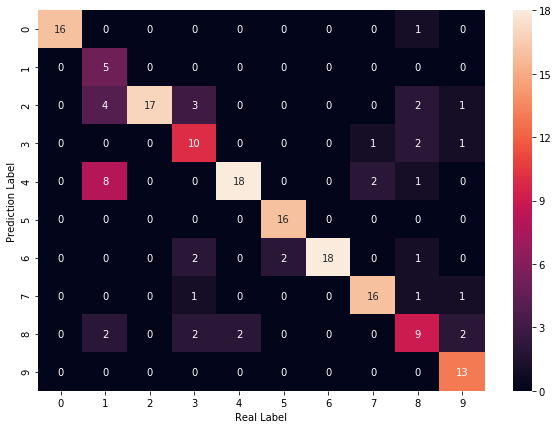

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:23 index:[5] real:5
#1 min_error:16 index:[2] real:2
#2 min_error:22 index:[8] real:8
#3 min_error:5 index:[0] real:0
#4 min_error:22 index:[4] real:1
#5 min_error:17 index:[7] real:7
#6 min_error:7 index:[6] real:6
#7 min_error:17 index:[3] real:3
#8 min_error:7 index:[2] real:2
#9 min_error:21 index:[4] real:1
#10 min_error:25 index:[3] real:7
#11 min_error:21 index:[8] real:4
#12 min_error:5 index:[6] real:6
#13 min_error:18 index:[3] real:3
#14 min_error:21 index:[4] real:1
#15 min_error:18 index:[2 3] real:3
#16 min_error:25 index:[7] real:9
#17 min_error:18 index:[1] real:1
#18 min_error:17 index:[7] real:7
#19 min_error:5 index:[6] real:6
#20 min_error:25 index:[0] real:8
#21 min_error:8 index:[4] real:4
#22 min_error:13 index:[3] real:3
#23 min_error:15 index:[4] real:1
#24 min_error:6 index:[4] real:4
#25 min_error:4 index:[0] real:0
#26 min_error:14 index:[5] real:5
#27 min_error:16 index:[3] real:3
#28 min_error:13 index:[6] real:6
#29 min_error:15 index:[9] rea

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8824984539270253
Avg Base Learner:0.8109997938569368


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.08333333333333333
Accuracy on training set: 0.20555555555555555
Accuracy on training set: 0.3111111111111111
Accuracy on training set: 0.31666666666666665
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.4222222222222222
Accuracy on training set: 0.5444444444444444
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5055555555555555
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.4888888888888889
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.5555555555555556
Accuracy on training set: 0.5277777777777778
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6
Accuracy on training set: 0.6333333333333333
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6888888888888889
Accuracy on training set: 0.6888888888888889
Accuracy on training

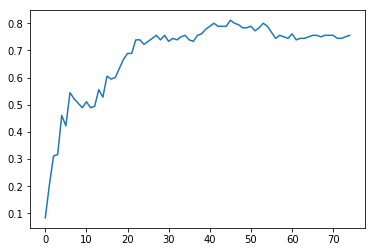

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.08333333333333333,
 0.20555555555555555,
 0.3111111111111111,
 0.31666666666666665,
 0.46111111111111114,
 0.4222222222222222,
 0.5444444444444444,
 0.5222222222222223,
 0.5055555555555555,
 0.4888888888888889,
 0.5111111111111111,
 0.4888888888888889,
 0.49444444444444446,
 0.5555555555555556,
 0.5277777777777778,
 0.6055555555555555,
 0.5944444444444444,
 0.6,
 0.6333333333333333,
 0.6666666666666666,
 0.6888888888888889,
 0.6888888888888889,
 0.7388888888888889,
 0.7388888888888889,
 0.7222222222222222,
 0.7333333333333333,
 0.7444444444444445,
 0.7555555555555555,
 0.7388888888888889,
 0.7555555555555555,
 0.7333333333333333,
 0.7444444444444445,
 0.7388888888888889,
 0.75,
 0.7555555555555555,
 0.7388888888888889,
 0.7333333333333333,
 0.7555555555555555,
 0.7611111111111111,
 0.7777777777777778,
 0.7888888888888889,
 0.8,
 0.7888888888888889,
 0.7888888888888889,
 0.7888888888888889,
 0.8111111111111111,
 0.8,
 0.7944444444444444,
 0.7833333333333333,
 0.7833333333333333,
 0.7